# LOAN RECOMMENDATION SYSTEM

In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
pip install xlrd

  Obtaining dependency information for xlrd from https://files.pythonhosted.org/packages/a6/0c/c2a72d51fe56e08a08acc85d13013558a2d793028ae7385448a6ccdfae64/xlrd-2.0.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   -------------------------------------- - 92.2/96.5 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [32]:
data = pd.read_excel("default of credit card clients.xls", header=1)
data.rename(columns={"default payment next month": "default"}, inplace=True)

In [34]:
# Define features and target
X = data.drop(columns=["default"])
y = data["default"]


In [35]:
# Encode categorical features (if any)
label_enc = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_enc.fit_transform(X[col])


In [36]:
# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [38]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Model 1: Random Forest Classifier

In [39]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Model 2: Deep Learning Neural Network

In [40]:
def build_nn_model():
    model = Sequential([
        Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.4),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = build_nn_model()
nn_model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test), verbose=1)
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test)

Epoch 1/30
585/585 [==============================] - 10s 14ms/step - loss: 0.5876 - accuracy: 0.6885 - val_loss: 0.5677 - val_accuracy: 0.7075
Epoch 2/30
585/585 [==============================] - 9s 15ms/step - loss: 0.5645 - accuracy: 0.7050 - val_loss: 0.5571 - val_accuracy: 0.7098
Epoch 3/30
585/585 [==============================] - 9s 15ms/step - loss: 0.5575 - accuracy: 0.7087 - val_loss: 0.5501 - val_accuracy: 0.7136
Epoch 4/30
585/585 [==============================] - 9s 16ms/step - loss: 0.5533 - accuracy: 0.7125 - val_loss: 0.5452 - val_accuracy: 0.7167
Epoch 5/30
585/585 [==============================] - 9s 15ms/step - loss: 0.5490 - accuracy: 0.7147 - val_loss: 0.5443 - val_accuracy: 0.7233
Epoch 6/30
585/585 [==============================] - 8s 14ms/step - loss: 0.5472 - accuracy: 0.7168 - val_loss: 0.5402 - val_accuracy: 0.7189
Epoch 7/30
585/585 [==============================] - 9s 15ms/step - loss: 0.5434 - accuracy: 0.7189 - val_loss: 0.5434 - val_accuracy: 0.718

In [41]:
# Print results
print("Random Forest Accuracy:", rf_accuracy)
print("Neural Network Accuracy:", nn_accuracy)

Random Forest Accuracy: 0.8636849989300235
Neural Network Accuracy: 0.7495185136795044



Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4673
           1       0.88      0.84      0.86      4673

    accuracy                           0.86      9346
   macro avg       0.86      0.86      0.86      9346
weighted avg       0.86      0.86      0.86      9346


Random Forest - Confusion Matrix:
[[4142  531]
 [ 743 3930]]


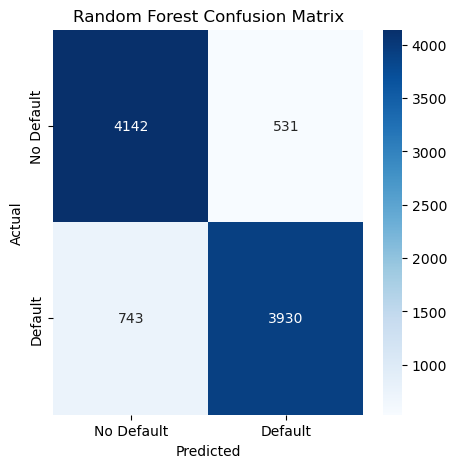

In [49]:
from sklearn.metrics import classification_report

# Function to print evaluation metrics
def print_classification_metrics(y_true, y_pred, model_name):
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_true, y_pred))

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n{model_name} - Confusion Matrix:")
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Default', 'Default'], 
                yticklabels=['No Default', 'Default'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

# Evaluate Random Forest model
print_classification_metrics(y_test, y_pred_rf, "Random Forest")

# Predict probabilities for loan recommendations

In [43]:
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]
loan_recommendations = ["Eligible for Loan" if prob < 0.5 else "Not Eligible for Loan" for prob in rf_probabilities]

data_recommendation = pd.DataFrame({"Customer ID": range(len(loan_recommendations)), "Loan Recommendation": loan_recommendations})
print(data_recommendation.head(10))

   Customer ID    Loan Recommendation
0            0      Eligible for Loan
1            1      Eligible for Loan
2            2      Eligible for Loan
3            3      Eligible for Loan
4            4  Not Eligible for Loan
5            5      Eligible for Loan
6            6  Not Eligible for Loan
7            7      Eligible for Loan
8            8      Eligible for Loan
9            9      Eligible for Loan


In [45]:
history = nn_model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
585/585 [==============================] - 8s 14ms/step - loss: 0.4788 - accuracy: 0.7608 - val_loss: 0.5029 - val_accuracy: 0.7410
Epoch 2/30
585/585 [==============================] - 8s 13ms/step - loss: 0.4790 - accuracy: 0.7628 - val_loss: 0.4932 - val_accuracy: 0.7502
Epoch 3/30
585/585 [==============================] - 8s 13ms/step - loss: 0.4746 - accuracy: 0.7621 - val_loss: 0.4938 - val_accuracy: 0.7539
Epoch 4/30
585/585 [==============================] - 8s 13ms/step - loss: 0.4724 - accuracy: 0.7627 - val_loss: 0.4902 - val_accuracy: 0.7535
Epoch 5/30
585/585 [==============================] - 7s 12ms/step - loss: 0.4687 - accuracy: 0.7678 - val_loss: 0.4890 - val_accuracy: 0.7529
Epoch 6/30
585/585 [==============================] - 5s 9ms/step - loss: 0.4688 - accuracy: 0.7679 - val_loss: 0.4886 - val_accuracy: 0.7555
Epoch 7/30
585/585 [==============================] - 7s 12ms/step - loss: 0.4668 - accuracy: 0.7689 - val_loss: 0.4872 - val_accuracy: 0.7557


# Plot training history for Neural Network

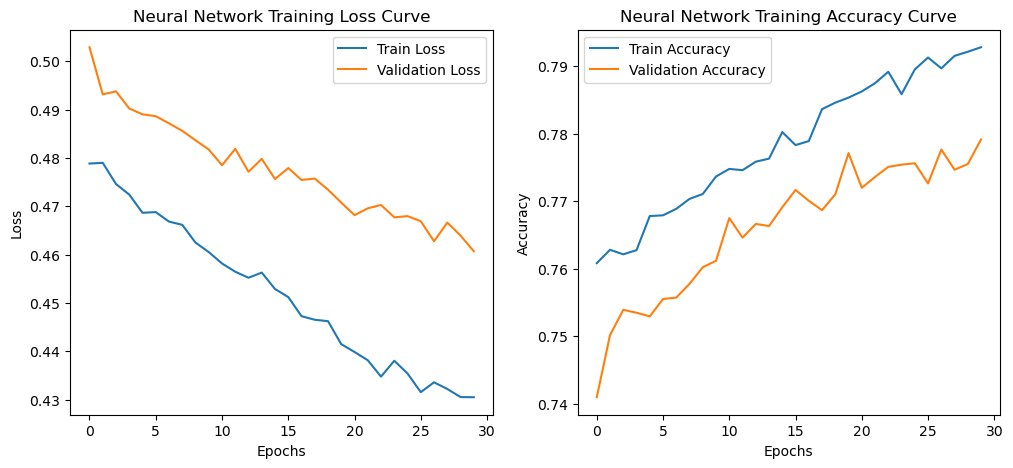

In [46]:
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history.get('loss', []), label='Train Loss')  # Use .get() to avoid KeyError
plt.plot(history.history.get('val_loss', []), label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network Training Loss Curve')
plt.legend()

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history.get('accuracy', []), label='Train Accuracy')
plt.plot(history.history.get('val_accuracy', []), label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Neural Network Training Accuracy Curve')
plt.legend()

plt.show()


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4673
           1       0.88      0.84      0.86      4673

    accuracy                           0.86      9346
   macro avg       0.86      0.86      0.86      9346
weighted avg       0.86      0.86      0.86      9346


Random Forest - Confusion Matrix:
[[4142  531]
 [ 743 3930]]


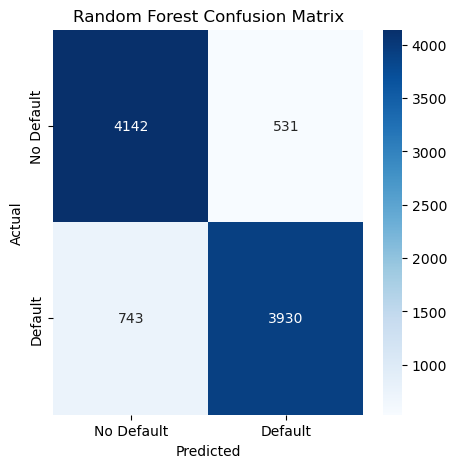

In [48]:
from sklearn.metrics import classification_report

# Function to print evaluation metrics
def print_classification_metrics(y_true, y_pred, model_name):
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_true, y_pred))

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n{model_name} - Confusion Matrix:")
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Default', 'Default'], 
                yticklabels=['No Default', 'Default'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

# Evaluate Random Forest model
print_classification_metrics(y_test, y_pred_rf, "Random Forest")

Inferences -  
**Random Forest Accuracy: 86.37%**

The Random Forest model achieved a high accuracy, indicating its effectiveness in predicting credit card defaults.

Ensemble learning methods like Random Forest work well with structured data, handling non-linearity and missing values efficiently.

The model likely benefited from its ability to capture complex relationships in the dataset.

**Neural Network Accuracy: 74.95%**

The Neural Network performed moderately well but was significantly lower than the Random Forest model.

Deep learning models require larger datasets to generalize well, and may need additional hyperparameter tuning to improve performance.

The performance gap suggests that tabular financial data might be better suited for traditional machine learning models like Random Forest rather than deep learning approaches